<a href="https://colab.research.google.com/github/bominwang/Bayesian-statistics-method/blob/bayesian-model-averaging-method/CUP_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import os
from google.colab import drive
drive.mount('/content/drive')
# 这里一定要加绝对绝对路径os.path.abspath
path = '/content/drive/MyDrive/Colab Notebooks/bm_wang/Bayesian_statistics_method/bayesian_model_averaging'
sys.path.append(os.path.abspath(path))

Mounted at /content/drive


In [2]:
import numpy as np
import scipy
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
!pip install -U emcee
import emcee
from multiprocessing import Pool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 6.9 MB/s eta 0:00:00


In [4]:
from bma_demo import Mathematical_examples_1

In [7]:
def demo1_displot(flag):
  x = np.linspace(1, 360, 100).reshape(100)
  if flag == 1:
    mu_y = []
    std_y = []
    for i in range(x.shape[0]):
      ins = x[i]
      theta1 = np.random.uniform(low = 1.7316, high = 2.1164, size = [1000,1])
      theta2 = np.random.uniform(low = 0.54, high = 0.66, size = [1000,1])
      input = np.concatenate((ins * np.ones([1000,1]), theta1, theta2), axis = 1)
      y = Mathematical_examples_1.func_1(input)
      mu = np.mean(y, axis = 0)
      std = np.std(y, axis = 0)
      mu_y.append(mu)
      std_y.append(std)
    mu_y = np.array(mu_y)
    std_y = np.array(std_y)
  
  elif flag == 2:
    mu_y = []
    std_y = []
    for i in range(x.shape[0]):
      ins = x[i]
      theta1 = np.random.uniform(low = 0.8955, high = 1.0945, size = [1000,1])
      theta2 = np.random.uniform(low = 22.185, high = 27.115, size = [1000,1])
      input = np.concatenate((ins * np.ones([1000,1]), theta1, theta2), axis = 1)
      y = Mathematical_examples_1.func_2(input)
      mu = np.mean(y, axis = 0)
      std = np.std(y, axis = 0)
      mu_y.append(mu)
      std_y.append(std)
    mu_y = np.array(mu_y)
    std_y = np.array(std_y)
  
  elif flag == 3:
    mu_y = []
    std_y = []
    for i in range(x.shape[0]):
      ins = x[i]
      theta1 = np.random.uniform(low = 1.9, high = 2.4, size = [1000,1])
      theta2 = np.random.uniform(low = 330, high = 400, size = [1000,1])
      theta3 = np.random.uniform(low =  0.25, high =  0.4, size = [1000,1])
      input = np.concatenate((ins * np.ones([1000,1]), theta1, theta2, theta3), axis = 1)
      y = Mathematical_examples_1.func_3(input)
      mu = np.mean(y, axis = 0)
      std = np.std(y, axis = 0)
      mu_y.append(mu)
      std_y.append(std)
    mu_y = np.array(mu_y)
    std_y = np.array(std_y)
  else: 
    mu_y = []
    std_y = []
    for i in range(x.shape[0]):
      ins = x[i]
      theta1 = np.random.uniform(low = 1.3869, high = 1.6951, size = [1000,1])
      theta2 = np.random.uniform(low = 0.14, high = 0.26, size = [1000,1])
      theta3 = np.random.uniform(low = 0.54, high =  0.7, size = [1000,1])
      input = np.concatenate((ins * np.ones([1000,1]), theta1, theta2, theta3), axis = 1)
      y = Mathematical_examples_1.func_4(input)
      mu = np.mean(y, axis = 0)
      std = np.std(y, axis = 0)
      mu_y.append(mu)
      std_y.append(std)
    mu_y = np.array(mu_y)
    std_y = np.array(std_y)    
  
  return x, mu_y, std_y

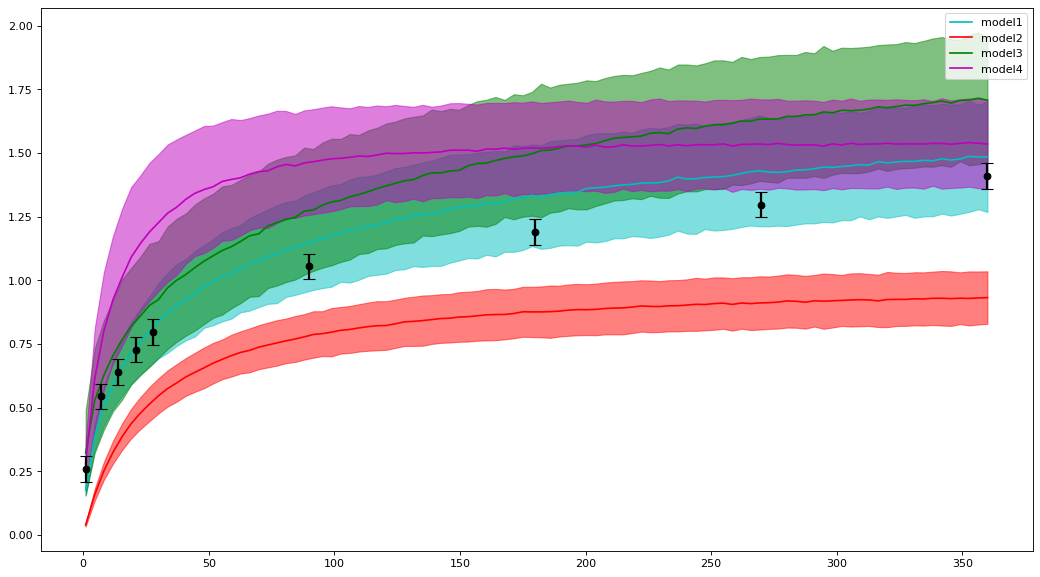

In [13]:
# data of experiments
ins_exp = np.array([1,7,14,21,28,90,180,270,360]).reshape(-1,1)
mu_exp = np.array([0.259,0.544,0.639,0.727,0.796,1.054,1.189,1.297,1.410]).reshape(-1,1)
std_exp = np.ones(shape = [ins_exp.shape[0], 1]) * 0.05
# data from simulations
x, mu_y1, std_y1 = demo1_displot(1)
x, mu_y2, std_y2 = demo1_displot(2)
x, mu_y3, std_y3 = demo1_displot(3)
x, mu_y4, std_y4 = demo1_displot(4)
plt.figure(1, figsize = [16, 9], dpi = 80)
plt.plot(x, mu_y1, '-c', label = 'model1')
#plt.plot(x, mu_y1 - 1.96 * std_y1, '-c')
#plt.plot(x, mu_y1 + 1.96 * std_y1, '-c')
plt.fill_between(x, mu_y1 - 1.96 * std_y1, mu_y1 + 1.96 * std_y1, alpha=0.5, color='c');
plt.plot(x, mu_y2, '-r', label = 'model2')
plt.fill_between(x, mu_y2 - 1.96 * std_y2, mu_y2 + 1.96 * std_y2, alpha=0.5, color='r');
plt.plot(x, mu_y3, '-g', label = 'model3')
plt.fill_between(x, mu_y3 - 1.96 * std_y3, mu_y3 + 1.96 * std_y3, alpha=0.5, color='g');
plt.plot(x, mu_y4, '-m', label = 'model4')
plt.fill_between(x, mu_y4 - 1.96 * std_y4, mu_y4 + 1.96 * std_y4, alpha=0.5, color='m');
for i in range(ins_exp.shape[0]):
  #plt.scatter(ins_exp[i].squeeze(), mu_exp[i].squeeze(), color = 'black')
  plt.errorbar(ins_exp[i].squeeze(), mu_exp[i].squeeze(), std_exp[i].squeeze(), color = 'black', elinewidth = 2, marker ='.', markersize = '12', capsize = 5)
plt.legend()
plt.show()

In [14]:
def experiments_subsampling(mean, std, count):
  # note : the shape of mean and std should be [number of data, 1]
  # note : the shape of the output from the function is [number of data, count], so one column is one subsample of the experiment data
  return np.random.normal(mean, std, size = [mean.shape[0],count])

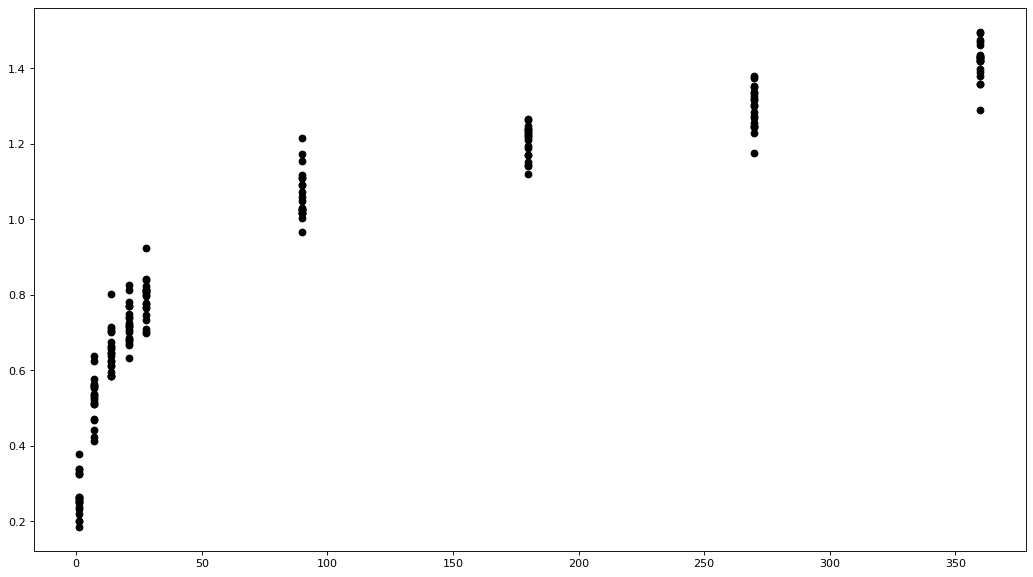

In [15]:
count_data = 20
exp = experiments_subsampling(mu_exp, std_exp, count_data)
plt.figure(2, figsize = (16, 9), dpi = 80)
for i in range(ins_exp.shape[0]):
  plt.scatter(ins_exp[i] * np.ones(shape = [count_data]), exp[i, :], color = 'black')

In [16]:
class calibration_parameter(object):
  def __init__(self, experiment_ins, experiment_lab, model, flag):
    self.ins_exp = experiment_ins.reshape(-1, 1)
    self.lab_exp = experiment_lab.reshape(-1, 1)
    self.model = model
    self.flag = flag
  
  def log_piror(self, theta):
    if self.flag == 1:
      theta1, theta2 = theta
      if 1.924 - 0.1 * 1.924 < theta1 < 1.924 + 0.1 * 1.925 and 0.6 - 0.1 * 0.6 < theta2 < 0.6 + 0.1 * 0.6:
        return 0.0
      return - np.inf
    elif self.flag == 2:
      theta1, theta2 = theta
      if 0.995 - 0.1 * 0.995 < theta1 < 0.995 + 0.1 * 0.995 and 24.65 - 0.1 * 24.65 < theta2 < 24.65 + 0.1 * 24.65:
        return 0
      return -np.inf


  
  def log_posterior(self, theta):
    
    if self.flag == 1:
      
      def log_piror(theta):
        theta1, theta2 = theta
        if 1.924 - 0.1 * 1.924 < theta1 < 1.924 + 0.1 * 1.925 and 0.6 - 0.1 * 0.6 < theta2 < 0.6 + 0.1 * 0.6:
          return 0.0
        return - np.inf
      
      def sigma_c(theta):
        theta1, theta2 = theta
        theta1 = np.repeat(theta1, self.ins_exp.shape[0], axis = 0).reshape(-1, 1)
        theta2 = np.repeat(theta2, self.ins_exp.shape[0], axis = 0).reshape(-1, 1)
        input = np.concatenate([self.ins_exp, theta1, theta2], axis = 1)
        pred = self.model(input)
        sigma2 = np.mean(np.power(pred.reshape(-1, 1) - self.lab_exp, 2))
        return sigma2
      
      def log_likelihood(theta):
        theta1, theta2 = theta
        sigma2 = sigma_c(theta)
        log_lik = np.log(np.power(2 * np.pi * sigma2, - 0.5 * self.ins_exp.shape[0])) - 0.5 * self.ins_exp.shape[0]
        return log_lik
    
      lp = log_piror(theta)
      if not np.isfinite(lp):
        return -np.inf
      ll = log_likelihood(theta)
      return lp + ll
    
    elif self.flag == 2:

      def log_piror(theta):
        theta1, theta2 = theta
        if 0.995 - 0.1 * 0.995 < theta1 < 0.995 + 0.1 * 0.995 and 24.65 - 0.1 * 24.65 < theta2 < 24.65 + 0.1 * 24.65:
          return 0
        return -np.inf
      def sigma_c(theta):
        theta1, theta2 = theta
        theta1 = np.repeat(theta1, self.ins_exp.shape[0], axis = 0).reshape(-1, 1)
        theta2 = np.repeat(theta2, self.ins_exp.shape[0], axis = 0).reshape(-1, 1)
        input = np.concatenate([self.ins_exp, theta1, theta2], axis = 1)
        pred = self.model(input)
        sigma2 = np.mean(np.power(pred.reshape(-1, 1) - self.lab_exp, 2))
        return sigma2
      def log_likelihood(theta):
        sigma2 = sigma_c(theta)
        log_lik = np.log(2 * np.pi * sigma2, -0.5 * self.ins_exp.shape[0]) - 0.5 * self.ins_exp.shape[0]
        return log_lik
      lp = log_piror(theta)
      if not np.isfinite(lp):
        return -np.inf
      ll = log_likelihood(theta)
      return lp + ll
    
    elif self.flag == 3:

      def log_piror(theta):
        theta1, theta2, theta3 = theta
        if 2.265 - 0.1 * 2.265 < theta1 < 2.265 + 0.1 * 2.265 and 364.21 - 0.1 * 364.21 < theta2 < 364.21 + 0.1 * 364.21 and 0.3 - 0.1 *  0.3 < theta3 < 0.3 + 0.1 *  0.3:
          return 0.0
        return -np.inf
      def sigma_c(theta):
        theta1, theta2, theta3 = theta
        theta1 = np.repeat(theta1, self.ins_exp.shape[0], axis = 0).reshape(-1, 1)
        theta2 = np.repeat(theta2, self.ins_exp.shape[0], axis = 0).reshape(-1, 1)
        theta3 = np.repeat(theta3, self.ins_exp.shape[0], axis = 0).reshape(-1, 1)
        input = np.concatenate([self.ins_exp, theta1, theta2, theta3], axis = 1)
        pred = self.model(input)
        sigma2 = np.mean(np.power(pred.reshape(-1, 1) - self.lab_exp, 2))
        return sigma2
      def log_likelihood(theta):
        sigma2 = sigma_c(theta)
        log_lik = np.log(2 * np.pi * sigma2, -0.5 * self.ins_exp.shape[0]) - 0.5 * self.ins_exp.shape[0]
        return log_lik
      lp = log_piror(theta)
      if not np.isfinite(lp):
        return -np.inf
      ll = log_likelihood(theta)
      return lp + ll
    else:
      def log_piror(theta):
        theta1, theta2, theta3 = theta
        if 1.541 - 0.1 * 1.541 < theta1 < 1.541 + 0.1 * 1.541 and 0.097 - 0.1 * 0.097 < theta2 < 0.097 + 0.1 * 0.097 and 0.6 - 0.1 *  0.6 < theta3 < 0.6 + 0.1 *  0.6:
          return 0.0
        return -np.inf
      def sigma_c(theta):
        theta1, theta2, theta3 = theta
        theta1 = np.repeat(theta1, self.ins_exp.shape[0], axis = 0).reshape(-1, 1)
        theta2 = np.repeat(theta2, self.ins_exp.shape[0], axis = 0).reshape(-1, 1)
        theta3 = np.repeat(theta3, self.ins_exp.shape[0], axis = 0).reshape(-1, 1)
        input = np.concatenate([self.ins_exp, theta1, theta2, theta3], axis = 1)
        pred = self.model(input)
        sigma2 = np.mean(np.power(pred.reshape(-1, 1) - self.lab_exp, 2))
        return sigma2
      def log_likelihood(theta):
        sigma2 = sigma_c(theta)
        log_lik = np.log(2 * np.pi * sigma2, -0.5 * self.ins_exp.shape[0]) - 0.5 * self.ins_exp.shape[0]
        return log_lik
      lp = log_piror(theta)
      if not np.isfinite(lp):
        return -np.inf
      ll = log_likelihood(theta)
      return lp + ll
  def mcmc_sampling(self, ndim, nwalkers, length_chain):
    if self.flag == 1:
      pos = np.random.rand(nwalkers, ndim) * np.array([[0.1, 0.1]]) + np.array([[1.9, 0.6]])
    elif self.flag == 2:
      pos = np.random.rand(nwalkers, ndim) * np.array([[0.1, 0.1]]) + np.array([[0.995, 24.65]])
    elif self.flag == 3:
      pos = np.random.rand(nwalkers, ndim) * np.array([[0.1, 0.1, 0.1]]) + np.array([[2.265, 364.21, 0.3]])
    else:
      pos = np.random.rand(nwalkers, ndim) * np.array([[0.1, 0.1, 0.1]]) + np.array([[1.541, 0.097, 0.6]])
    with Pool() as pool:
      sampler = emcee.EnsembleSampler(nwalkers, ndim, self.log_posterior, pool=pool)
      sampler.run_mcmc(pos, length_chain, progress=True)
    samples = sampler.get_chain(flat=True)
    return samples[20000:, :]

In [17]:
sample = calibration_parameter(ins_exp, mu_exp, Mathematical_examples_1.func_2, 2).mcmc_sampling(2, 500, 5000)

emcee: Exception while calling your likelihood function:
  params: [ 1.00727907 24.70656127]
emcee: Exception while calling your likelihood function:  args:
   params:[]
   kwargs: {}[ 1.0274286  24.73224963]
  args:
 []
  exception:  kwargs:
 {}
  exception:


Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/usr/local/lib/python3.9/dist-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-16-00064dc86cb0>", line 61, in log_posterior
    ll = log_likelihood(theta)
  File "<ipython-input-16-00064dc86cb0>", line 61, in log_posterior
    ll = log_likelihood(theta)
  File "<ipython-input-16-00064dc86cb0>", line 56, in log_likelihood
    log_lik = np.log(2 * np.pi * sigma2, -0.5 * self.ins_exp.shape[0]) - 0.5 * self.ins_exp.shape[0]
TypeError: return arrays must be of ArrayType
  File "<ipython-input-16-00064dc86cb0>", line 56, in log_likelihood
    log_lik = np.log(2 * np.pi * sigma2, -0.5 * self.ins_exp.shape[0]) - 0.5 * self.ins_exp.shape[0]


emcee: Exception while calling your likelihood function:
  params:

TypeError: return arrays must be of ArrayType


emcee: Exception while calling your likelihood function: 
[ 1.01733339 24.74025784]  params:
   args:[ 1.05835487 24.66998521] 
[]
  kwargs:  args:  []
{}  kwargs: 
  exception:


Traceback (most recent call last):


{}
  exception:

  File "/usr/local/lib/python3.9/dist-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)


  File "<ipython-input-16-00064dc86cb0>", line 61, in log_posterior
    ll = log_likelihood(theta)
Traceback (most recent call last):
  File "<ipython-input-16-00064dc86cb0>", line 56, in log_likelihood
    log_lik = np.log(2 * np.pi * sigma2, -0.5 * self.ins_exp.shape[0]) - 0.5 * self.ins_exp.shape[0]
  File "/usr/local/lib/python3.9/dist-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-16-00064dc86cb0>", line 61, in log_posterior
    ll = log_likelihood(theta)
TypeError: return arrays must be of ArrayType


emcee: Exception while calling your likelihood function:

  File "<ipython-input-16-00064dc86cb0>", line 56, in log_likelihood
    log_lik = np.log(2 * np.pi * sigma2, -0.5 * self.ins_exp.shape[0]) - 0.5 * self.ins_exp.shape[0]


TypeError: return arrays must be of ArrayType


  params:emcee: Exception while calling your likelihood function:
 [ 0.99880567 24.66166484]
  params:   args:[ 1.09199175 24.65377465]
   args:[]
 []  kwargs:
  kwargs: {} 
  exception:{}



Traceback (most recent call last):


  exception:


Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/usr/local/lib/python3.9/dist-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-16-00064dc86cb0>", line 61, in log_posterior
    ll = log_likelihood(theta)
  File "<ipython-input-16-00064dc86cb0>", line 56, in log_likelihood
    log_lik = np.log(2 * np.pi * sigma2, -0.5 * self.ins_exp.shape[0]) - 0.5 * self.ins_exp.shape[0]
TypeError: return arrays must be of ArrayType


emcee: Exception while calling your likelihood function:

  File "<ipython-input-16-00064dc86cb0>", line 61, in log_posterior
    ll = log_likelihood(theta)


  File "<ipython-input-16-00064dc86cb0>", line 56, in log_likelihood
    log_lik = np.log(2 * np.pi * sigma2, -0.5 * self.ins_exp.shape[0]) - 0.5 * self.ins_exp.shape[0]


  params:

TypeError: return arrays must be of ArrayType


emcee: Exception while calling your likelihood function: [ 1.04778013 24.69647099]

  args:  params: [ 1.05369958 24.72262558] 
  args: []
[]  kwargs:
  kwargs:  {}{}

  exception:  exception:


Traceback (most recent call last):


  File "/usr/local/lib/python3.9/dist-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
Traceback (most recent call last):
  File "<ipython-input-16-00064dc86cb0>", line 61, in log_posterior
    ll = log_likelihood(theta)
  File "/usr/local/lib/python3.9/dist-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-16-00064dc86cb0>", line 61, in log_posterior
    ll = log_likelihood(theta)
  File "<ipython-input-16-00064dc86cb0>", line 56, in log_likelihood
    log_lik = np.log(2 * np.pi * sigma2, -0.5 * self.ins_exp.shape[0]) - 0.5 * self.ins_exp.shape[0]
  File "<ipython-input-16-00064dc86cb0>", line 56, in log_likelihood
    log_lik = np.log(2 * np.pi * sigma2, -0.5 * self.ins_exp.shape[0]) - 0.5 * self.ins_exp.shape[0]
TypeError: return arrays must be of ArrayType
TypeError: return arrays must be of ArrayType


TypeError: ignored